# Logistic Regression
### Perceptron Trick

In [274]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative=1,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    random_state=41,
    hypercube=False,
    class_sep=10,
)

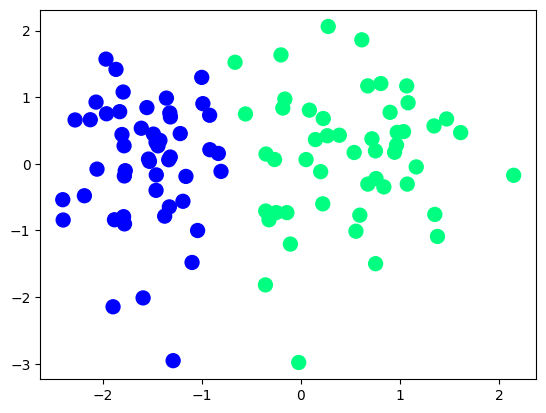

In [275]:
plt.scatter(X[:,0],X[:,1],c=y,cmap="winter",s=100)

In [276]:
class LogisticRegression2:
    def __init__(self, learning_rate, epochs):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weight = None
        self.bias = None

    def train(self, X, Y):
        n_samples, n_features = X.shape
        self.weight = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.epochs):
            for idx, Xi in enumerate(X):
                z = np.dot(Xi, self.weight) + self.bias
                # y_hat = np.where(z >= 0, 1, 0)
                y_hat = 1/(1+np.exp(-z))
                
                # Update weights and bias
                self.weight += self.learning_rate * (Y[idx] - y_hat) * Xi
                self.bias += self.learning_rate * (Y[idx] - y_hat)
        return self.weight, self.bias

    def predict(self, X):
        z = np.dot(X, self.weight) + self.bias
        # Y_PRED = np.where(z >= 0, 1, 0)
        sigmoid = 1/(1+np.exp(-z))
        Y_PRED = np.where(sigmoid >= 0.5, 1, 0)
        return Y_PRED

In [277]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [278]:
X.shape, y.shape


((100, 2), (100,))

In [279]:
lgr = LogisticRegression2(0.1, 1000)
lgr.train(X, y)

y_pred = lgr.predict(X_test)
y_pred

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [280]:
Y_test

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0])

In [281]:
accuracy_score(Y_test, y_pred)

1.0

In [282]:
slope = -(lgr.weight[0]/lgr.weight[1])
intercept = -(lgr.bias/lgr.weight[1])

# x_input = np.linspace(-3,3,100)
x_input = X
y_output = slope*x_input+intercept

(-3.0, 3.0)

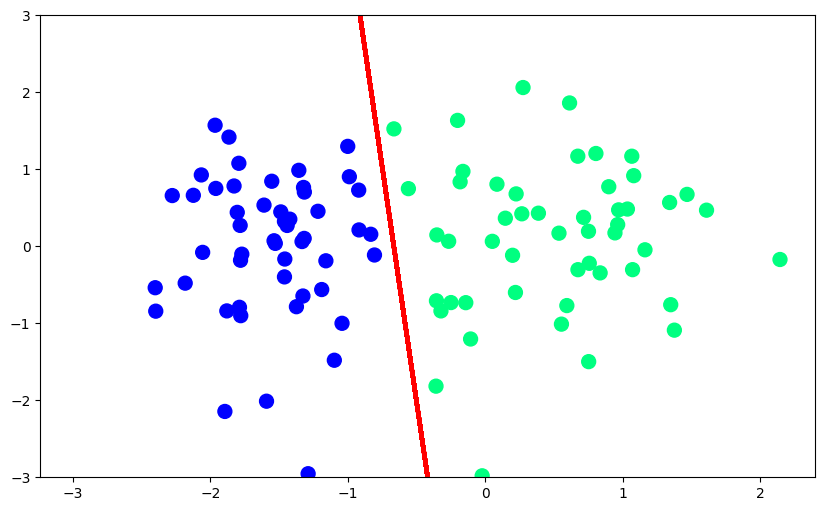

In [283]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_output,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,3)

In [284]:
lgr.weight, lgr.bias

(array([17.90021104,  1.46794034]), 11.898512236405034)

In [285]:
lgr2 = LogisticRegression()
lgr2.fit(X_train, Y_train)
y_pred2 = lgr2.predict(X_test)

In [286]:
accuracy_score(Y_test, y_pred2)

1.0

In [287]:
slope2 = -(lgr.weight[0]/lgr.weight[1])
intercept2 = -(lgr.bias/lgr.weight[1])

# x_input = np.linspace(-3,3,100)
x_input2 = X
y_output2 = slope2*x_input2+intercept2

(-3.0, 3.0)

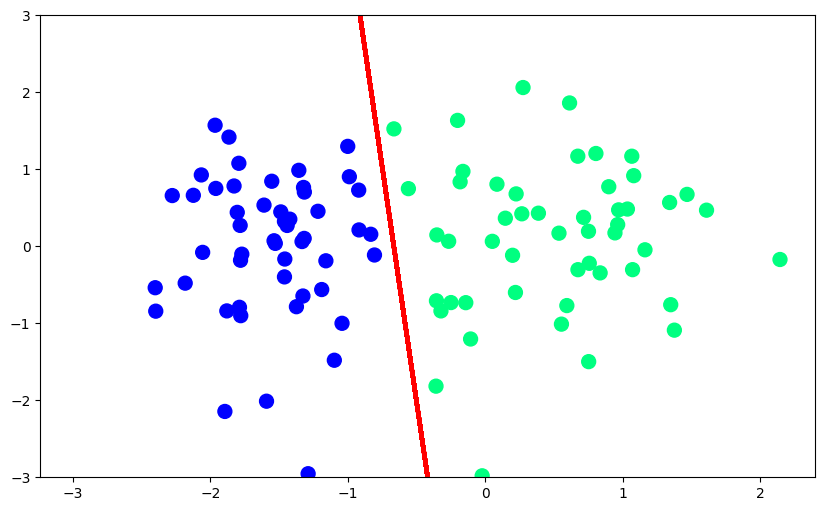

In [288]:
plt.figure(figsize=(10,6))
plt.plot(x_input2,y_output2,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,3)

In [290]:
lgr2.coef_, lgr2.intercept_

(array([[3.26121027, 0.11797815]]), array([2.33315104]))